## Credit Card Fraud Detection using Machine learning 

> As this is a binary classification problem we will be using Logistic Regression model for model training 
### Workflow of model 

* Collection of data
* Data Preprocessing
* Splitting test and training data
* Model Training
* Model Evaluation
* Prediction System


### importing dependencies

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Loading dataset into data frame

In [10]:
# importing data

transaction_dataset= pd.read_csv("/content/drive/MyDrive/google_collab/creditcard.csv")
transaction_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [11]:
# last 5 rows

transaction_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Data Analysis

In [12]:
# check shape of dataset

transaction_dataset.shape

# dataset has 73377 rows and 31 columns

(284807, 31)

In [13]:
# dataset information 

transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# dataset datatype

transaction_dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
# mathematical values of dataset

transaction_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
# finding null values in dataset

transaction_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
# total null values in all rows and columns

transaction_dataset.isnull().sum().sum()

# hence there are total 28 null values

0

In [18]:
# distribution of legit transaction and fraudulent transaction

transaction_dataset['Class'].value_counts()

# data is highly unbalanced 

0    284315
1       492
Name: Class, dtype: int64

### Seperating data for analysis
  - 0 : Normal transaction
  - 1 : Fraudulent transaction

In [19]:
legit = transaction_dataset[transaction_dataset.Class == 0]
fraud = transaction_dataset[transaction_dataset.Class == 1]

In [20]:
print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (284315, 31)
Shape of fraud :  (492, 31)


In [22]:
# measures

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()
# fraud transaction description

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
# comparing the values for both transaction 

transaction_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under-Sampling 

- build a sample dataset having similar distribution of normal and fraudulent transactions.
- number of fraudulent transaction is = 492

In [28]:
ligit_sample = transaction_dataset.sample(n = 492)

#### Concatinating two samplings

In [29]:
new_transaction_dataset2 = pd.concat([ligit_sample, fraud], axis = 0)

In [30]:
new_transaction_dataset2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155292,105051.0,-0.499793,0.673704,2.197506,-0.324329,0.284650,0.206579,0.326897,-0.020506,1.495998,...,-0.305002,-0.521419,-0.359940,-0.633552,0.251746,-0.713259,-0.093065,-0.163703,2.12,0
135003,81068.0,1.201997,0.320203,0.211550,1.247285,-0.104591,-0.533112,0.208950,-0.087875,-0.205523,...,0.014899,0.174079,-0.157315,0.357910,0.810643,-0.278249,0.005817,0.003237,1.00,0
42692,41202.0,-0.342865,0.740781,0.985139,0.673561,0.727307,1.508112,0.386136,0.501699,-0.783163,...,0.328143,1.095287,0.077953,-0.796567,-0.524963,-0.243130,0.033730,0.006651,32.68,0
97090,66069.0,1.389132,-1.145339,0.777612,-1.444203,-1.630253,-0.248654,-1.287493,0.130540,-1.924039,...,-0.279466,-0.500653,0.223721,0.161893,-0.021786,-0.409347,0.050689,0.018159,19.60,0
247571,153621.0,1.942827,-0.020259,-2.000533,0.010153,1.362394,1.207958,-0.133240,0.340120,0.192131,...,-0.262181,-0.555047,0.339253,-1.026343,-0.415139,0.278351,-0.014410,-0.055815,1.79,0


In [31]:
new_transaction_dataset2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [32]:
new_transaction_dataset2['Class'].value_counts()

1    494
0    490
Name: Class, dtype: int64

In [33]:
new_transaction_dataset2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95990.902041,0.123493,0.084168,0.048935,0.03707,0.022880,0.076276,0.037980,0.056860,0.063291,...,0.025979,-0.023721,-0.026782,-0.019659,0.021465,-0.009236,0.027581,0.021006,0.002142,85.838469
1,80743.186235,-4.766861,3.614813,-7.022345,4.53823,-3.144182,-1.399171,-5.557948,0.568995,-2.577896,...,0.374362,0.716279,0.015498,-0.038176,-0.102763,0.039635,0.050905,0.169466,0.079408,122.582085


### Data Visualization

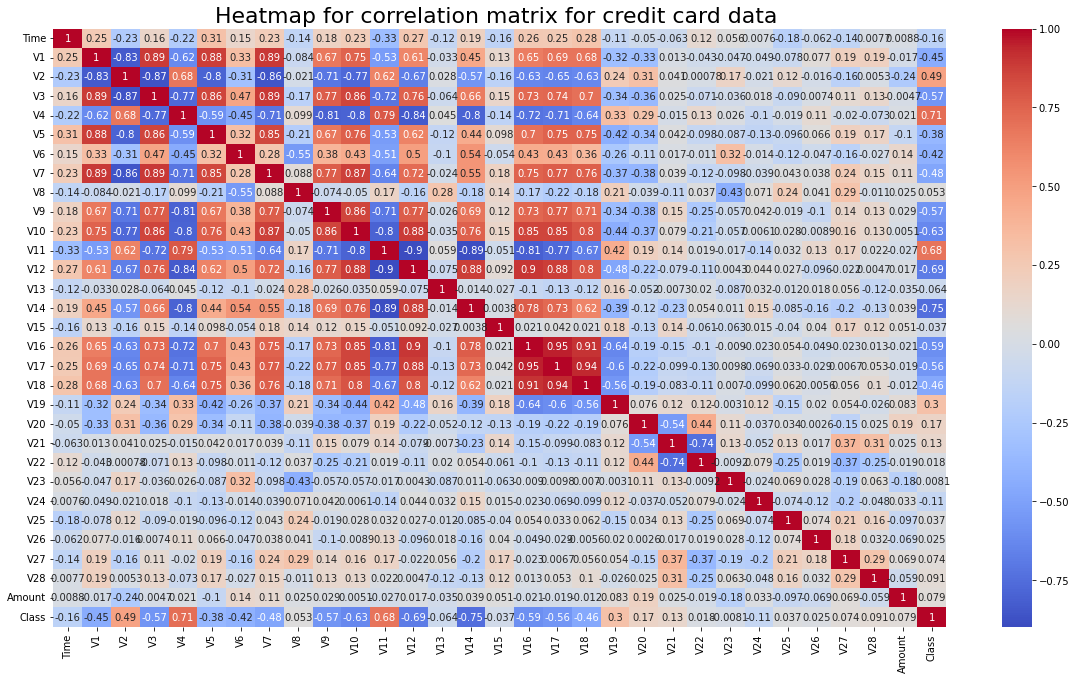

In [40]:
plt.figure(figsize = (20,11))
# heatmap size in ration 16:9

sns.heatmap(new_transaction_dataset2.corr(), annot = True, cmap = 'coolwarm')
# heatmap parameters

plt.title("Heatmap for correlation matrix for credit card data ", fontsize = 22)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

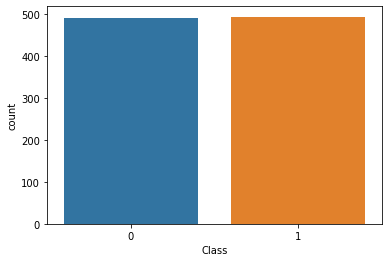

In [42]:
sns.countplot(new_transaction_dataset2.Class)

### Splitting the data into features and Targets

In [43]:
X = new_transaction_dataset2.drop(columns = 'Class', axis = 1)
Y = new_transaction_dataset2['Class']

In [44]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
155292,105051.0,-0.499793,0.673704,2.197506,-0.324329,0.284650,0.206579,0.326897,-0.020506,1.495998,...,-0.001094,-0.305002,-0.521419,-0.359940,-0.633552,0.251746,-0.713259,-0.093065,-0.163703,2.12
135003,81068.0,1.201997,0.320203,0.211550,1.247285,-0.104591,-0.533112,0.208950,-0.087875,-0.205523,...,-0.160865,0.014899,0.174079,-0.157315,0.357910,0.810643,-0.278249,0.005817,0.003237,1.00
42692,41202.0,-0.342865,0.740781,0.985139,0.673561,0.727307,1.508112,0.386136,0.501699,-0.783163,...,-0.178210,0.328143,1.095287,0.077953,-0.796567,-0.524963,-0.243130,0.033730,0.006651,32.68
97090,66069.0,1.389132,-1.145339,0.777612,-1.444203,-1.630253,-0.248654,-1.287493,0.130540,-1.924039,...,-0.377421,-0.279466,-0.500653,0.223721,0.161893,-0.021786,-0.409347,0.050689,0.018159,19.60
247571,153621.0,1.942827,-0.020259,-2.000533,0.010153,1.362394,1.207958,-0.133240,0.340120,0.192131,...,-0.192093,-0.262181,-0.555047,0.339253,-1.026343,-0.415139,0.278351,-0.014410,-0.055815,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [45]:
Y

155292    0
135003    0
42692     0
97090     0
247571    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

### Splitting the data into training and testing data


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [50]:
print("Shape of X_train ", X_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_train ", Y_train.shape)
print("Shape of Y_test ", Y_test.shape)


Shape of X_train  (787, 30)
Shape of X_test  (197, 30)
Shape of Y_train  (787,)
Shape of Y_test  (197,)


### Model Training 

In [53]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation

- Accuracy Score

In [54]:
# accuracy on training data 

X_train_prediction = model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [57]:
print("Accuracy on Training data ",traning_data_accuracy)

Accuracy on Training data  0.9390088945362135


In [61]:
# accuracy on testing data 

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [62]:
print("Accuracy on Training data ",test_data_accuracy)

Accuracy on Training data  0.9441624365482234
